In [1]:
current_covariance = 1
is_using_moving_sum = False

In [2]:
N = 150
d = 1
a = 1

In [3]:
import numpy as np

def first_covariance_function(t, d, a):
    return d * np.exp(-a * abs(t))

def second_covariance_function(t, d, a):
    return d * np.sin(a * t) / (a * t) if t != 0 else d

def third_covariance_function(t, d, a):
    return d - d * t / a if t <= a else 0

covariance_function = [first_covariance_function, second_covariance_function, third_covariance_function][current_covariance - 1]

In [4]:
def first_characteristic_function(t):
    return 1.29608 / np.sqrt(1.67985 - 5.28764j * t - 4 * t ** 2)

def third_characteristic_function(t):
    return 1.0/(1-t*0.5j)

characteristic_function = [first_characteristic_function, None, third_characteristic_function][current_covariance - 1]

In [5]:
from randel.models.moving_sum import MovingSumSimulator
from randel.models.exact import FirstSimulator, SecondSimulator, ThirdSimulator

if is_using_moving_sum:
    simulator = MovingSumSimulator(
        N,
        loc=0,
        covariance_function=lambda x: covariance_function(x, d, a)
    )
    values = simulator.simulate_process()
else:
    simulator = [FirstSimulator, SecondSimulator, ThirdSimulator][current_covariance - 1](N, d, a)
    values = simulator.simulate_process()

In [6]:
from randel.descriptive_statistics import DescriptiveStatisticsCalculator

calculator = DescriptiveStatisticsCalculator()
calculator.calculate(values)
calculator.print()

Mean: 0.03415743940901937
Median: 0.016371265886734578
Standard deviation: 0.96889411539652
Variance: 0.938755806850005
Asymmetry coefficient: 0.04484929572266931
Kurtosis: -0.3881254610887015


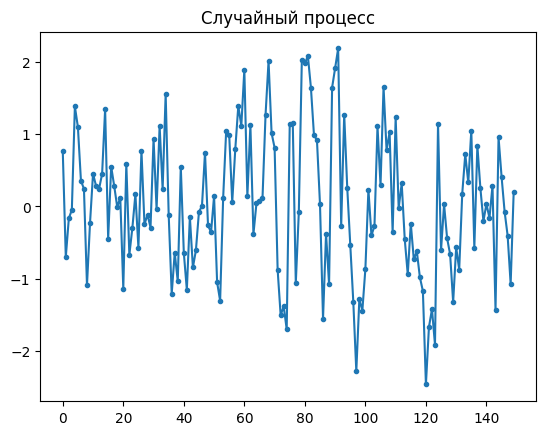

In [7]:
from randel.plotters import plot_process

plot_process(values)

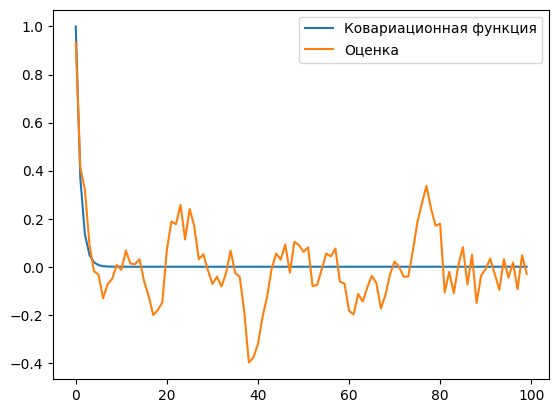

In [8]:
from randel.plotters import plot_covariance_function

plot_covariance_function(lambda x: covariance_function(x, d, a), values)

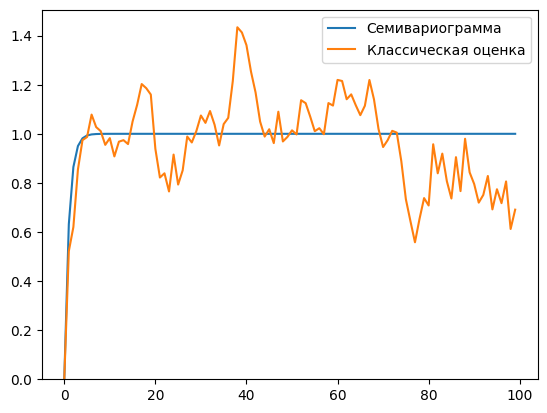

In [9]:
from randel.estimators.classic import ClassicSemivariogramEstimator
from randel.plotters import plot_semivariogram

def semivariogram(t, d, a):
    return d - covariance_function(t, d, a)

plot_semivariogram(lambda x: semivariogram(x, d, a), ClassicSemivariogramEstimator(N-1, values))

/Users/evgenij/PycharmProjects/random_process/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2458: ComplexWarning: Casting complex values to real discards the imaginary part
  res = asanyarray(outputs, dtype=otypes[0])


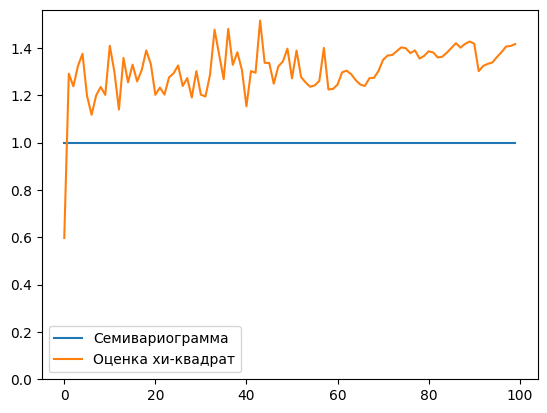

In [10]:
from randel.estimators.chi_square import ChiSquareSemivariogramEstimator

def plot_white_noise_semivariogram(variance):
    plot_semivariogram(lambda x: variance, ChiSquareSemivariogramEstimator(N, np.identity(N) * variance))
    
plot_white_noise_semivariogram(1)

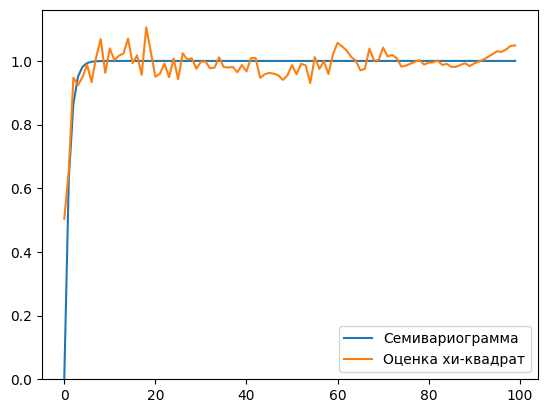

In [11]:
plot_semivariogram(lambda x: semivariogram(x,d,a), ChiSquareSemivariogramEstimator(N, lambda x: covariance_function(x,d,a)))

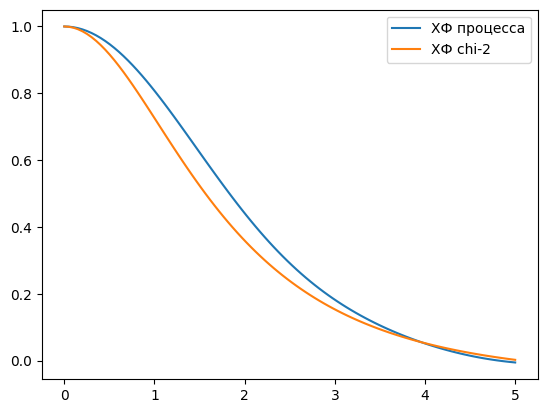

In [63]:
from randel.plotters import plot_characteristic_function

N=5
d=1
h=2
a=0.5

new_simulator = [FirstSimulator, SecondSimulator, ThirdSimulator][current_covariance - 1](N, d, a)
plot_characteristic_function(lambda x: covariance_function(x, d, a), h, new_simulator)